## Bug Report : bKash agent point location missing

Description:

    TARGET WEBSITE: https://www.bkash.com/en/help/locator/agent-point
    TARGET FEATURE: AGENT POINT LOCATOR
    
    1. nearly 1 lakh data points (agent location adress / shopname) are missing in the web, probably      missing in the mobile app too?
    
    2. missing districts are:
                a. Bogura',
                b. 'Jhalokati',
                c. 'Moulvibazar',
                d. 'Cumilla',
                5. 'Jashore',
                6. 'Khagrachhari',
                7. 'Chapainababganj',
                8. 'Chattogram',
                9. "Cox's Bazar",
                10. 'Netrakona'
                
    3. I saw a lot of addresses wrongly indexed under wrong district and thana. but too lazy to
        bring that report up right now.

*I have scrapped the entire agent location data , 12690 agents' name and adress available on the website. nah, i think i dont need to share the dataset here, guys at bkash can check it out on their own, if they bother. but if they ask, i can give it anytime, IF ANYBODY INTERESTED, damn i will share the whole scrapper with code as well.*

In [40]:
import pandas as pd

In [2]:
#import the cleaned dataset
df = pd.read_csv("cleaned_data.csv")

In [33]:
df.info()
# no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189042 entries, 0 to 189041
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   district         189042 non-null  object
 1   agent_shop_name  189042 non-null  object
dtypes: object(2)
memory usage: 2.9+ MB


189042 ? but bkash website says it's nearly 3 lakhs. lets see..

In [6]:
# uuhh. dont need them right now.
df = df.drop(['thana','agent_address'], axis=1)

In [34]:
df.head()
# ok looks good

,district,agent_shop_name
0,Feni,Mayer Doya Cooling Corner
1,Feni,Al Nadi Pharmacy
2,Feni,Sakil And Sojib Store
3,Feni,Najma Store And Telecom
4,Feni,Kazi Telecom And Mobile Servicing


In [35]:
# check if all the districts are in the dataset
dists = df['district'].unique()
len(dists)

54

wait, what?? 54? 10 districts are missing???

In [24]:
# ok take a list of 64 districts

dist_64 = ['Bandarban', 'Brahmanbaria', 'Chandpur' ,'Chattogram', "Cox's Bazar",
 'Cumilla', 'Feni', 'Khagrachhari' ,'Lakshmipur' ,'Noakhali' ,'Rangamati',
 'Dhaka', 'Faridpur' ,'Gazipur' ,'Gopalganj', 'Kishoreganj' ,'Madaripur',
 'Manikganj', 'Munshiganj', 'Narayanganj' ,'Narsingdi' ,'Rajbari' ,'Shariatpur',
 'Tangail' ,'Bagerhat' ,'Chuadanga', 'Jashore' ,'Jhenaidah' ,'Khulna', 'Kushtia',
 'Magura', 'Meherpur', 'Narail' ,'Satkhira' ,'Bogura', 'Chapainababganj',
 'Joypurhat', 'Naogaon' ,'Natore' ,'Pabna' ,'Rajshahi' ,'Sirajganj' ,'Barguna',
 'Barishal' ,'Bhola' ,'Jhalokati' ,'Patuakhali' ,'Pirojpur', 'Jamalpur',
 'Mymensingh', 'Netrakona', 'Sherpur' ,'Dinajpur' ,'Gaibandha' ,'Kurigram',
 'Lalmonirhat' ,'Nilphamari' ,'Panchagarh', 'Rangpur' ,'Thakurgaon' ,'Habiganj',
 'Moulvibazar', 'Sunamganj' ,'Sylhet']

In [36]:
# Find missing items
uncommon_items = set(dist_64) ^ set(dists)
uncommon_list = list(uncommon_items)
print("Uncommon items:", uncommon_list)

Uncommon items: ['Bogura', 'Jhalokati', 'Moulvibazar', 'Cumilla', 'Jashore', 'Khagrachhari', 'Chapainababganj', 'Chattogram', "Cox's Bazar", 'Netrakona']


In [31]:
## really? they are missing? let's cross check. yah, really missing. is it an issue with my scrapping?

array(['Bagerhat', 'Bandarban', 'Barguna', 'Barishal', 'Bhola',
       'Brahmanbaria', 'Chandpur', 'Chuadanga', 'Dhaka', 'Dinajpur',
       'Faridpur', 'Feni', 'Gaibandha', 'Gazipur', 'Gopalganj',
       'Habiganj', 'Jamalpur', 'Jhenaidah', 'Joypurhat', 'Khulna',
       'Kishoreganj', 'Kurigram', 'Kushtia', 'Lakshmipur', 'Lalmonirhat',
       'Madaripur', 'Magura', 'Manikganj', 'Meherpur', 'Munshiganj',
       'Mymensingh', 'Naogaon', 'Narail', 'Narayanganj', 'Narsingdi',
       'Natore', 'Nilphamari', 'Noakhali', 'Pabna', 'Panchagarh',
       'Patuakhali', 'Pirojpur', 'Rajbari', 'Rajshahi', 'Rangamati',
       'Rangpur', 'Satkhira', 'Shariatpur', 'Sherpur', 'Sirajganj',
       'Sunamganj', 'Sylhet', 'Tangail', 'Thakurgaon'], dtype=object)

lets check out the website manually

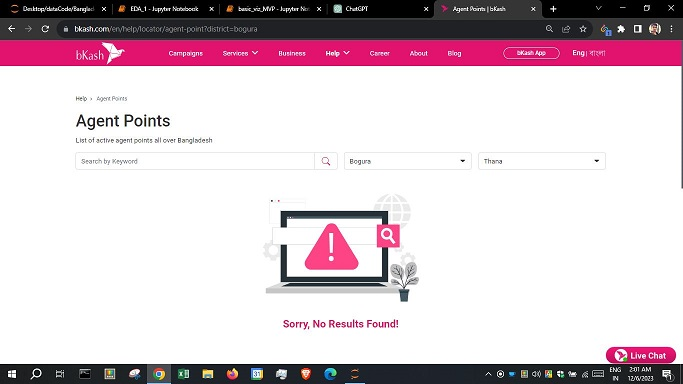

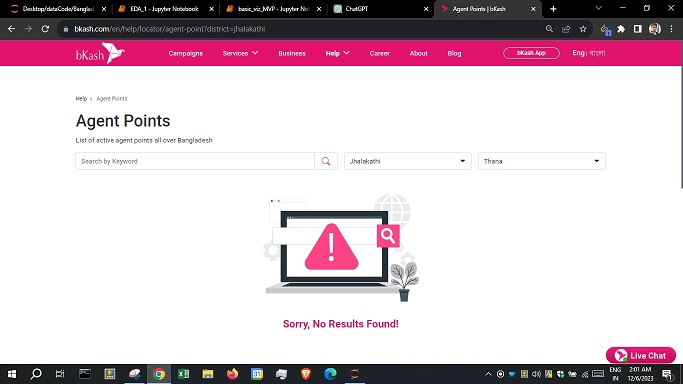

yep, all the other 8 districts are missing too.

#### interesting! if agent location from 10 districts are missing on the web, are they missing in the mobile app as well? does guys at bKash know about this bug?

##### 10 districts are missing here.
['Bogura', 'Jhalokati', 'Moulvibazar', 'Cumilla', 'Jashore', 'Khagrachhari', 'Chapainababganj', 'Chattogram', "Cox's Bazar", 'Netrakona']


# uggghh! Just remembered bkash has rejected me from their intership program :D

#### any way, i might let 'em know about this...

### wait, agent address from these locations might not be just properly indexed? they might pop up in keyword search?

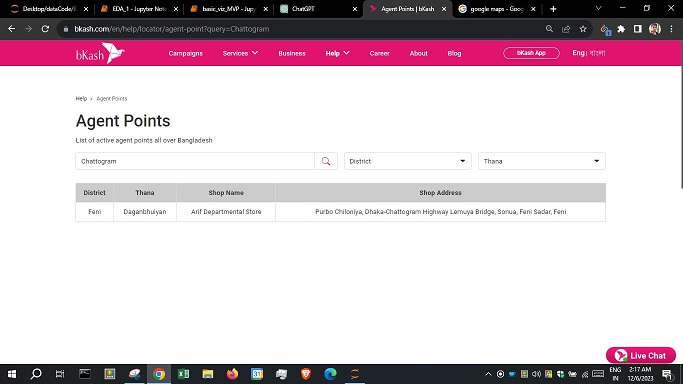

### nah!! dead missing!

now what about my mapping? dataset is flawed. districts like Bogura, Chattogram, jashore must have agents in lakhs in total. 189042 agents i found on the web, add up the missing , then it will make up to 3 lakhs. yah, makes sense.

In [38]:
300000 - 189042

110958

#### 110958 agent locations missing.

            Sample of missing datapoints URLS:
            1. https://www.bkash.com/en/help/locator/agent-point?district=jhalakathi
            2. https://www.bkash.com/en/help/locator/agent-point?district=cumilla
            3. https://www.bkash.com/en/help/locator/agent-point?query=chattogram

anyway, it might be a simple Database error. but they didn't fixed it. i scrapped the data back in august maybe.

Mohammad mashud iqbal
email: mashud.iqbal.87@gmail.com
linkedin: https://www.linkedin.com/in/iqbal23/